In [13]:
import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from functools import reduce
from functools import wraps

In [2]:
from visualizacoes import display_vec, display_matrix

## Introdução a regressão em aprendizagem de máquina supervisionada

Modelos matemáticos nada mais são do que representações matemáticas de um cenário ou situação real. Quando temos uma boa representação desse cenário, podemos realizar simulações e previsões com alto grau de confiança e utilizar os resultados para a tomada de decisão. A qualidade da representação do cenário i.e a qualidade do modelo depende de uma série de fatores, mas os principais resumem-se em: ao volume, riqueza e relevância de informações históricas que se tem sobre o cenário, e a escolha da formulação matemática que seja mais aderente a esses dados de forma a criar um conjunto de regras matemáticas que retornem um resultado próximo da realidade dentro daquele cenário:

<img src='https://lh3.googleusercontent.com/proxy/Y_bUsAhtg97y4bA7TXGPFqXUxwBuonfpUv1uwpF1h3r_pYCpwqwe1lOcqflpTIsookLfGSulze8cCKumWx5stprlMlJJFnD6x60qg1iAB0esIQm2hqpqzIa2WMHYyuUpSxJE'>

Vamos explorar melhor isso com um dos modelos mais simples (e ao mesmo tempo poderosos), dado pela equação abaixo:

$$\normalsize y = w x + b $$

Essa é exatamente a equação da regressão linear, apenas usando a notação da somatória. Basicamente, é um modelo que assume que uma variável dependente $y$ pode ser explicada como a soma de um conjunto de variáveis independentes explicativas $x$ que possuem pesos $w$ diferentes para explicar $y$, e soma-se a isso um coeficiente de viés $b$. No contexto de modelagem e aprendizado de máquina, quando temos a nossa disposição valores de $y$ e seus respectivos valores de $x$ associados, podemos aplicar algum tipo de modelo matemático (como a própria equação acima) para entender qual a relação entre os valores de $x$ que levam aquele específico valore de $y$. A partir dessa compreensão, podemos aplicar este mesmo modelo a novos dados de $x$ dos quais não temos o valor associado de $y$, justamente para podermos estimar qual é esse valor ($\hat{y}$). Essa prática por sua vez é de grande valor e tem sido aplicada em âmbito acadêmico e no mercado com grande sucesso nos últimos anos em uma diversidade monstruosa de aplicações.

Ainda pensando na explicação sobre a equação acima, e a aprendizagem supervisionada, fica intuitivo imaginar que o problema que queremos resolver são justamente os valores de $w$ e $b$ que desenham o modelo de maneira mais realista possível. Vamos imaginar um exemplo simples: Temos valores de três imóveis A,B e C que armazenaremos no vetor $y$ abaixo:

In [3]:
y = np.array([250000, 124000, 370500, 220100], dtype='int64')

In [4]:
display_vec(y, 'y')

<br>$y = \begin{bmatrix}250000\\124000\\370500\\220100\end{bmatrix}$<br>

Não apenas temos o valor dos imóveis, mas também temos a área dos imóveis em m². Vamos chamar esse vetor de $x$:

In [5]:
x = np.array([210, 120, 332, 285], dtype='int64')

In [6]:
display_vec(x,'x')

<br>$x = \begin{bmatrix}210\\120\\332\\285\end{bmatrix}$<br>

Destes dois vetores, podemos plotar os pontos no plano cartesiano:

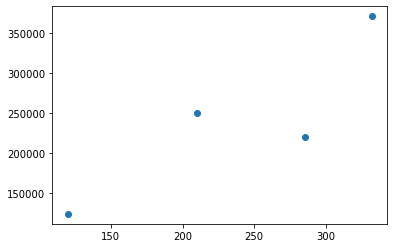

In [7]:
plt.scatter(x,y)

Nitidamente, podemos ver que existe algum tipo de relação entre o preço do imóvel e seu m² (é óbvio isso, mas serve para o propósito do exemplo). O que queremos então, é algum modelo matemático que consiga explicar essa relação entre $x$ e $y$, e para isso podemos justamente usar a equação mostrada acima. Você provavelmente já viu essa formula em algum momento na escola, pois é a equação que representa geométricamente uma __linha__. 

Temos os valores do imóvel e suas áreas, o que queremos é justamente os valores de $w$ e $b$ que melhor explicam essa relação. Podemos descrever esse cenário como um sistema simples (que também vimos na escola):

$$ \left\{\begin{matrix}210*w + b = 250000 \\ 120*w + b = 124000\\ 332*w + b = 370500\\ 285*w + b = 220100\end{matrix}\right.$$

Através do sistema fica mais fácil entender o problema: precisamos encontrar os valores de $w$ e $b$ que melhor satisfaçam essa equação. Mas o que significa __satisfazer__ a equação neste caso? No caso de machine learning, sempre, ou quase sempre, medimos o quanto um modelo é satisfatório através de uma __função de erro / custo__: uma função que quantifica o quanto os valores previstos pelo modelo se aproximam, ou se distanciam dos valores reais que eram esperados, em outras palavras, é um indicativo de que o modelo aprendeu um conjunto de regras que explicam ou não nossas variáveis. 

PUma função de erro bastante popular e simples é a função de erro quadrático médio, ou __MSE (Mean Squared Error)__. Essa função é bem simples, e trata-se da média de uma simples subtração entre os valores reais e os valores previstos pelo modelo, elevado ao quadrado (de forma a ser sempre positivo):

$$ \normalsize MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2$$

Onde $N$ representa a quantidade de valores previstos, $y_i$ representa o valor real / esperado e $\hat{y_i}$ representa o valor previsto pelo nosso modelo.

Para casos de regressão como esse, no entando, o __R-Squared__ (ou coeficiente de determinação, ou ainda R²) é a mais utilizada como métrica de erro. O cálculo é bastante semelhante na verdade com MSE, exceto que o denominador no R² é somatória da subtração de cada valor real de $y$ pela média dos valores de $y$ sendo elevando ao quadrado:

$$ \normalsize R^2 = \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y_i})^2}$$

Vamos tentar entender melhor essas contas acima. Para isso, suponha que temos um primeiro modelo onde $w = 800$ e $b = -500$. Criamos abaixo essa função:

In [8]:
modelo = lambda x: x * -100 + 200000

Agora basta aplicar esse modelo aos valores de $x$. Aqui vai o primeiro insight: poderíamos criar um loop e interar sobre cada valor de $x$, aplicar o modelo e armazenar esse valor, um por um? __SIM!__. Vale a pena? __NÃO!__. Uma das primeiras coisas que aprendemos nessa área, é que representar equações como as acima de maneira matricial é muito mais performático e eficiente. De fato, todos os principais frameworks de redes neurais por exemplo, que nos aprofundaremos mais a frente aqui, operam através de cálculos vetoriais e estruturas matriciais que podem ser paralelizadas e aceleradas por GPU's, mas isso é assunto para outros tópicos, que apenas aparecerá neste notebook as vezes.

No nosso caso, como ambos os valores de $x$ quando de $y$ já estão representados como vetores (intencionalmente), podemos aplicar essa função diretamente no vetor, e gerar um novo vetor $\hat{y}$ contendo os valores dos imóveis estimados pelo modelo :

In [9]:
y_previsto = modelo(x)

Agora, vamos implementar uma função R² para calcular o quanto nosso modelo está se aproximando ou se afastando dos valores originais:

In [10]:
def R_Quadrado(y_real, y_pred):
    SQR = np.square(y_pred - y_real).sum()
    SQT = np.square(y_real - y_real.mean()).sum()
    return 1 - (SQR/SQT)
    #print("[SCRIPT] Coeficiente de determinação R²: %.3f" % R)

Abaixo, plotamos um gráfico demonstrando a aplicação da função e o cálculo do R². Os pontos azuis são os mesmos plotados anteriormente, representando os dados reais. A linha tracejada representa o modelo encontrado, que como já sabemos, dado a equação $y = wx + b$, sabemos que é uma reta. Os marcadores vermelhos em "x" representam os valores dos imóveis de acordo com o modelo, e é exatamente a diferença entre os pontos azuis e os pontos vermelhos que entrega o coeficiente de determinação R². Esse valor quando igual a 1, significa que o modelo de regressão explica exatamente todos os pontos existentes, ou seja, a linha passa exatamente por todos os pontos. Valores de R abaixo de zero significam que seu modelo não é melhor do que uma constante. De fato, se compararmos esse modelo abaixo, com um modelo constante que retorna o preço de um imóvel por exemplo como sendo a média de valor dos demais imóveis ($\hat{y} = \bar{y}$), ainda seria melhor do que o modelo que encontramos. 

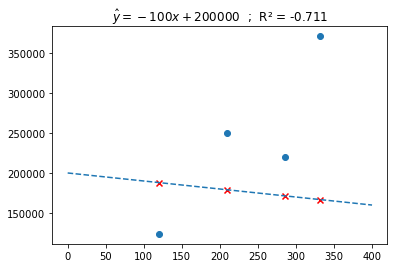

In [11]:
plt.scatter(x,y)
plt.scatter(x, y_previsto, color='red', marker='x')
plt.plot(np.linspace(0,400,10), modelo(np.linspace(0,400,10)), linestyle='--')
t = plt.title('$\hat{y} = -100x + 200000$  ;  R² = %.3f' % R_Quadrado(y, y_previsto))

Como o R² está muito baixo, podemos mexer um pouco nos parâmetros do modelo ($w$ e $b$) e tentar encontrar um modelo melhor. Testaremos com os seguintes parâmetros agora: 

$$ \normalsize \hat{y} = 800x - 3000 $$

In [12]:
modelo = lambda x: x * 800 - 3000

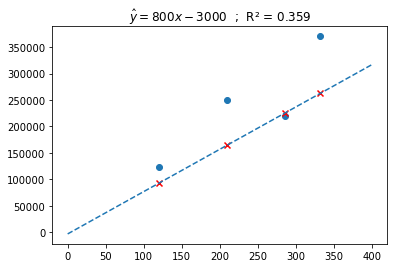

In [13]:
plt.scatter(x,y)
plt.scatter(x, modelo(x), color='red', marker='x')
plt.plot(np.linspace(0,400,10), modelo(np.linspace(0,400,10)), linestyle='--')
t = plt.title('$\hat{y} = 800x - 3000$  ;  R² = %.3f' % R_Quadrado(y, modelo(x)))

Repare que os novos parêmtros mostraram um ajuste melhor do modelo aos dados, e já temos um modelo melhor do que uma constante, e usamos como referência para otimizar o modelo justamente uma função de custo tal qual o coeficiente de determinação. Com isso explicamos basicamente o que é aprendizado de máquina __supervisionado__: 

1º Consolidar uma base de dados histórica contendo os pontos $(X,Y)$

2º Definir um modelo matemático pertinente ao problema 

3º Definir uma função de custo para avaliar o modelo frente aos dados históricos

4º Aplicar algum __algoritmo interativo__ para encontrar os parâmetros que minimizam a função de custo escolhida

Essa quarta etapa é geralmente a mais complexa e pesada computacionalmente, e é o que seria caracterizado como o processo de __aprendizagem__, treino. É exatamente isso que fizemos manualmente acima, testamos duas combinações diferentes de parâmetros e vimos qual delas entrega um modelo com menor função de custo, que no nosso caso é o maior R² possível, que se aproxima de 1. No caso de regressões, um algoritmo bastante utilizado para encontrar os parâmetros ótimos é o __OLS (Ordinary Least Squares)__. Nós não exploraremos esse algoritmo, pois o foco destes notebooks são redes neurais (que tem relação em sua arquitetura com regressões e por isso estamos introduzindo isso primeiro), mas no caso de redes neurais, exploraremos aqui mais a frente outro algoritmo de otimização, um dos mais poderosos existentes, o __backpropagation__.

Abaixo importamos um algoritmo de OLS ja implementado através do popular pacote de machine larning __scikit-learn__, para encontrar nesse simples exemplo qual seria o modelo ótimo, aquele que melhor se ajusta aos dados:

In [14]:
from sklearn.linear_model import LinearRegression

Após importar o algoritmo, fazemos a instancia dele em um objeto chamado `OLS`. Esses conceitos remetem a __programação orientada a objetos__ que não exploraremos aqui. 

In [15]:
OLS = LinearRegression()

A função `fit` do algoritmo é o que realiza o treinamento do modelo, e passamos as variáveis dependentes e independentes, como podemos esperar. 

In [16]:
OLS.fit(x.reshape(4,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Realizado o treinamento, podemos extrair os parâmetros encontrados pelo algoritmo e aplicar em nosso modelo. O $w$ é armazenado no atributo `coef_` enquanto que o bias $b$ está armazenado no atributo `intercept_` justamente, de intercepto que mencionamos acima. Abaixo atribuímos nas variáveis `w`, `b` e depois aplicamos no modelo otimizado:

In [17]:
w = OLS.coef_
b = OLS.intercept_

Agora novamente criamos uma função anônima para aplicar esse modelo

In [18]:
modelo_otimo = lambda x: x*w + b

Gerando novamente a visualização:

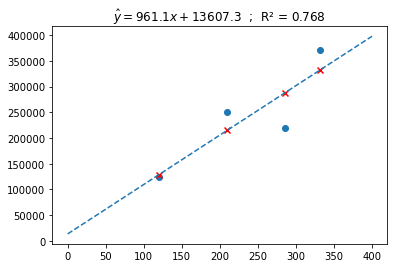

In [19]:
plt.scatter(x,y)
plt.scatter(x, modelo_otimo(x), color='red', marker='x')
plt.plot(np.linspace(0,400,10), modelo_otimo(np.linspace(0,400,10)), linestyle='--')
t = plt.title('$\hat{y} = %.1fx + %.1f$  ;  R² = %.3f' % (w, b, R_Quadrado(y, modelo_otimo(x))))

O algoritmo de otimização encontrou os valores de $w$ e $b$ que geram o melhor R², ou a menor função de custo. Mesmo assim, percebemos que esse modelo ainda deixa a desejar em alguns aspectos. No caso de alguns dos imóveis, o erro ainda é muito alto, quase como se houvessem __mais variáveis__ influênciando o preço dos imóveis além do seu tamanho. De fato, foi isso que mencionamos na introdução sobre modelos matemáticos: estamos representando um cenário através de variáveis. Um cenário descrito em uma variável como o exemplo que estamos usando acima pode não ser o suficiente para explicar a variável dependente, e nesse caso seria necessário descrever o cenário em um modelo que contenha mais variáveis. Isso pode ser feito fazendo uma pequena alteração na equação da regressão simples, que agorá será uma regressão múltipla:

$$ \normalsize y = w_1 x_1 + w_2 x_2 + ... w_n x_n + b $$

Ou seja, ao invés de uma variável independente apenas, podemos descrever $y$ como um conjunto de variáveis com seus respectivos pesos $w$. Isso pode ser rescrito como:

$$ \normalsize y = \sum_{i=1}^{n} w_i x_i + b $$

Voltando ao exemplo dos imóveis, suponha então que além do preço e tamanho dos imóveis, temos também uma variável nos indicando quantos banheiros esse imóvel possui:

In [20]:
x2 = np.array([3, 2, 5, 2])

In [21]:
display_vec(x2, 'x_2')

<br>$x_2 = \begin{bmatrix}3\\2\\5\\2\end{bmatrix}$<br>

O sistema agora que representa o problema é o seguinte:

$$ \left\{\begin{matrix}210*w_1 + 3*w_2 + b = 250000 \\ 120*w_1 + 2*w_2 + b = 124000\\ 332*w_1 + 5*w_2 + b = 370500\\ 285*w_1 + 2*w_2 + b = 220100\end{matrix}\right.$$


Novamente, o problema se resume a encontrar os coeficientes que melhor ajustam o modelo aos dados históricos, então podemos usar o mesmo algoritmo pronto do pacote scikit-learn para encontrar os parâmetros $w_1$, $w_2$ e $b$

In [22]:
OLS.fit(np.c_[x, x2], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
w1 = OLS.coef_[0]
w2 = OLS.coef_[1]
b = OLS.intercept_ 

Agora criamos um novo modelo, que comporta duas variáveis independentes:

In [24]:
modelo_multiplo = lambda x1, x2: w1*x1 + w2*x2 + b

In [25]:
previsoes = []

In [26]:
for v1, v2 in zip(x, x2):
    y_pred = modelo_multiplo(v1, v2)
    previsoes.append(y_pred)

In [27]:
R_Quadrado(y, previsoes)

0.9759939037280312

Agora, um fator é muito importante de ser mencionado aqui, e vai influênciar completamente sua vida na área de machine learning. Anteriormente, mostramos como esse problema pode ser resumir a um sistema de equações. Da mesma forma, podemos resolver o problema da regressão múltipla como um sistema:

$$ \normalsize \left\{\begin{matrix}w_1x_{11} + w_2x_{12} + \cdots w_nx_{1n} + b = y_1 \\ w_1x_{21} + w_2x_{22} + \cdots w_nx_{2n} + b = y_2 \\ \vdots \\ w_1x_{m1} + w_2x_{m2} + \cdots w_nx_{mn} + b = y_m\end{matrix}\right.$$

Algo muito intuitivo de se imaginar conforme aumentamos a complexidade do modelo utilizado é que a quantidade de operações matemáticas a serem realizadas no processo todo é maior, e com isso, a exigência por recursos computacionais será por consequência maior também. Isso pode não ser um fator relevante para um exemplo simples como este, mas no mercado, não são raros os cenários onde bases históricas com milhões de registros e variáveis serão utilizadas. Resolver problemas de modelagem através de expressões algébricas como essas não é a tarefa mais performática ao passo de que aumentamos a complexidade e, uma maneira de se reduzir o custo computacional e acelerar computações é com a __vetorização__. Podemos representar sistemas como operações entre matrizes e vetores:

$$ \normalsize XW + B = Y \Leftrightarrow  \begin{bmatrix} x_{11} & x_{12} & \cdots & x_{1n}\\ x_{21} & x_{22} & \cdots & x_{2n} \\ \vdots & \vdots & \ddots  & \vdots \\ x_{m1} & x_{12} & \cdots & x_{mn} \end{bmatrix}  \begin{bmatrix}w_1\\ w_2\\ \vdots\\ w_n\end{bmatrix} + \begin{bmatrix}b_1\\ b_2\\ \vdots\\ b_m\end{bmatrix} = \begin{bmatrix}y_1\\ y_2\\ \vdots\\ y_m\end{bmatrix} $$

Onde $X$ é uma matriz contendo os valores das $n$ variáveis independentes para as $m$ observações, $W$ é um vetor contendo os pesos das $n$ variáveis, $B$ é um vetor contendo os valores de bias e $Y$ é um vetor contendo as variáveis dependentes (variável resposta) das $m$ observações. 

In [28]:
X = np.c_[x,x2]

In [29]:
display_matrix(X)

<br>$\begin{bmatrix}210&3\\120&2\\332&5\\285&2\end{bmatrix}$<br><br>

Dimensões da matriz: (4 x 2)



In [30]:
W = OLS.coef_

In [31]:
display_vec(W)

<br>$\begin{bmatrix}522.61\\43590.79\end{bmatrix}$<br>

In [32]:
display_vec([b for i in range(4)])

<br>$\begin{bmatrix}-13349.61\\-13349.61\\-13349.61\\-13349.61\end{bmatrix}$<br>

In [33]:
Y = X.dot(W) + b

In [34]:
display_vec(Y)

<br>$\begin{bmatrix}227170.26\\136544.83\\378109.91\\222775.00\end{bmatrix}$<br>

In [35]:
R_Quadrado(y, Y)

0.9759939037280312